dataset :

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/discussion/232298?sort=votes

#Ideas and work flow
1) dataset is imbalanced. 95% class 0 and 5% class 1.
    
    as the dataset has <5000 rows. we can use oversampling, using undersampling doesnt capture much information.
    We can try appling SMOTE or use try using boosting algorithms which takes special intrest on failed predictions
    or use some cv techniques

2) apply log to skewed features(avg glucose levels)

3) missing values for bmi

4)check outliers


#Import dependencies


In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#logistic regression,Rideg classifier, SVM, KNN, NB, Dtrees, RForest, ABoost, GBoost, XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, StratifiedGroupKFold, StratifiedShuffleSplit



#import data

In [344]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

#EDA

In [345]:
df.shape

(5110, 12)

In [346]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [347]:
#check for balanced data set
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [348]:
#check for balanced data set
df.stroke.value_counts()/len(df)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


we have 5 categorical and 6 numerical features and Only BMI column has missing values

In [350]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


avg glucose level feature is slightly right skewed and age,hypertension, heart disease features looks minor skewness which we can evade.

If they are skewed we apply log function to the features.

In [351]:
numerical = df[['age','hypertension','heart_disease','avg_glucose_level','stroke','gender']]

In [352]:
sns.set_style('darkgrid')

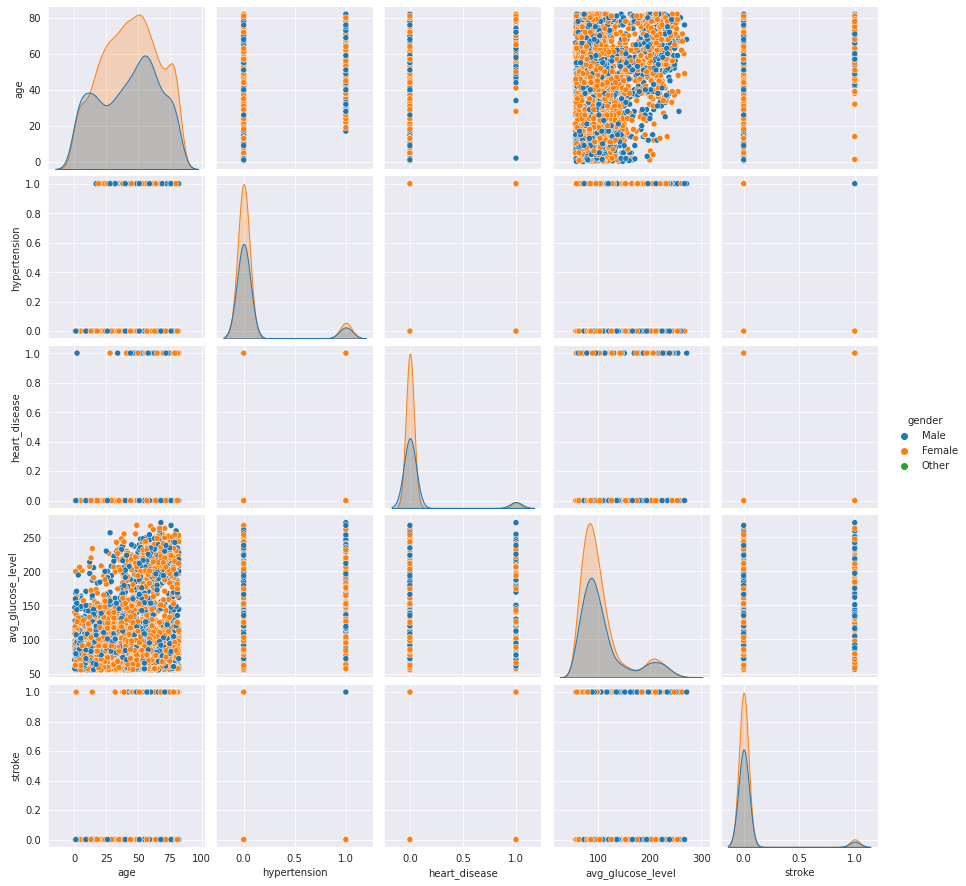

In [353]:
sns.pairplot(numerical,hue = 'gender')

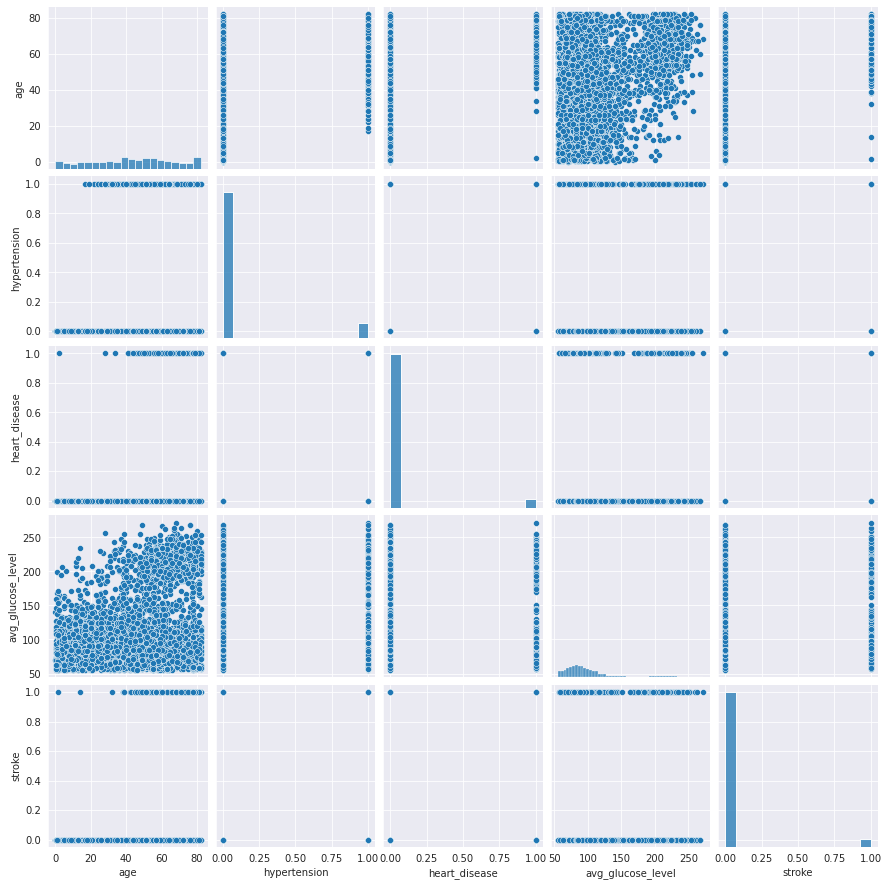

In [354]:
sns.pairplot(numerical)

pair plot only gives us the realtional plots but we need to check the categorical distribution

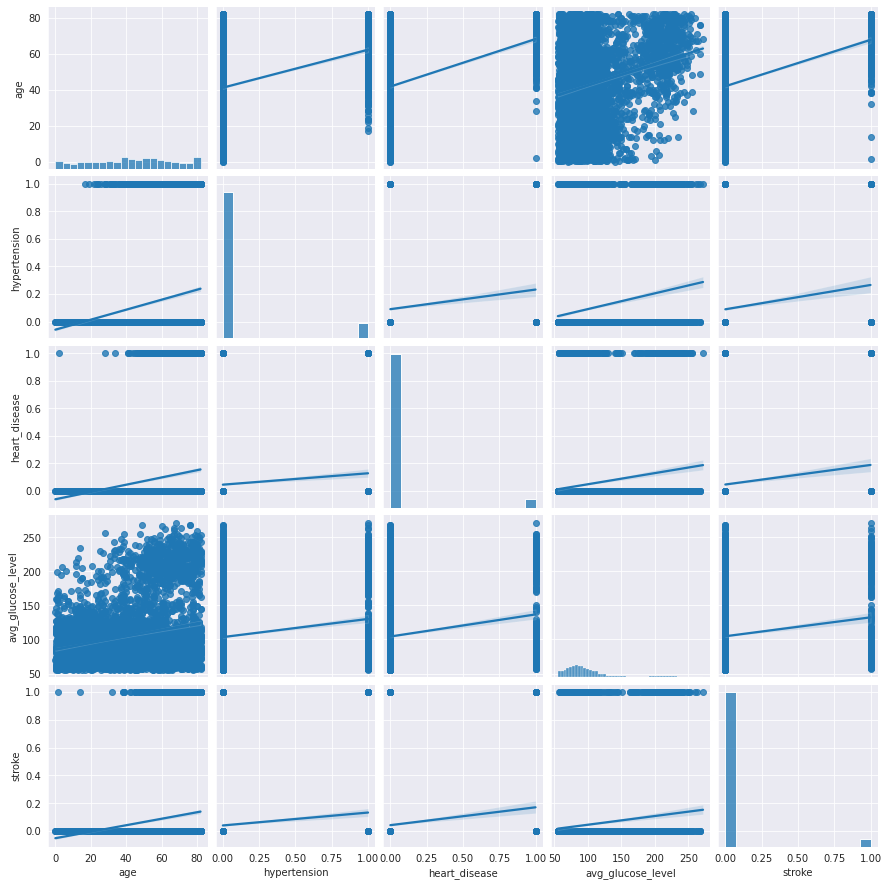

In [355]:
sns.pairplot(numerical,kind = 'reg')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


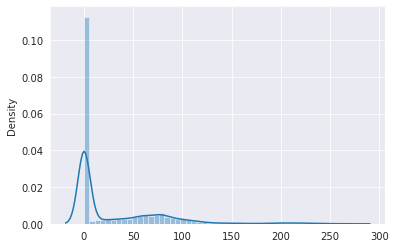

In [356]:
sns.distplot(df[['age','hypertension','heart_disease','avg_glucose_level','stroke']])

In [357]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [358]:
df.id.value_counts()
#droping id column

9046     1
22194    1
15104    1
28315    1
56996    1
52588    1
10243    1
5074     1
16010    1
63764    1
27916    1
21653    1
34257    1
38078    1
40167    1
44243    1
6289     1
19828    1
26604    1
60249    1
27125    1
22003    1
448      1
8264     1
31925    1
57288    1
55370    1
19032    1
6731     1
21762    1
45787    1
34543    1
3003     1
13219    1
39017    1
38938    1
72354    1
65526    1
15383    1
13155    1
45961    1
66973    1
12911    1
46767    1
54294    1
50644    1
17623    1
3946     1
59671    1
51385    1
47499    1
6665     1
62076    1
4753     1
71724    1
14063    1
32717    1
2972     1
16109    1
8790     1
11371    1
46461    1
63898    1
46797    1
36728    1
52679    1
65277    1
5068     1
6973     1
52234    1
11259    1
21953    1
44759    1
71424    1
10138    1
62090    1
71099    1
12003    1
38783    1
27518    1
54574    1
41404    1
33252    1
17745    1
57539    1
57968    1
65731    1
70833    1
33960    1
67786    1
40076    1

In [359]:
df = df.drop('id',axis = 'columns')

In [360]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


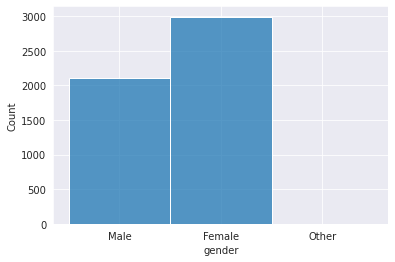

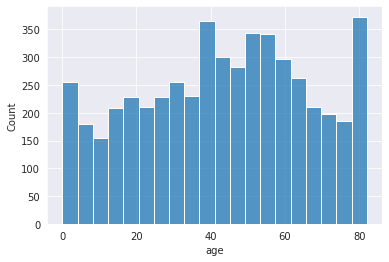

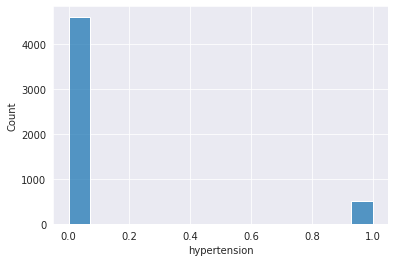

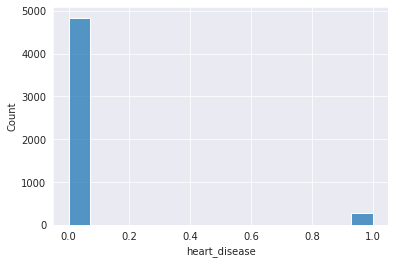

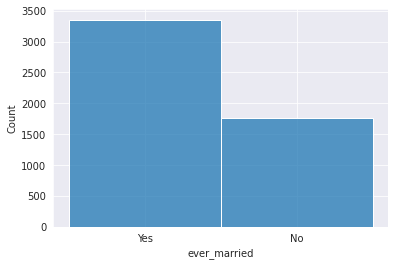

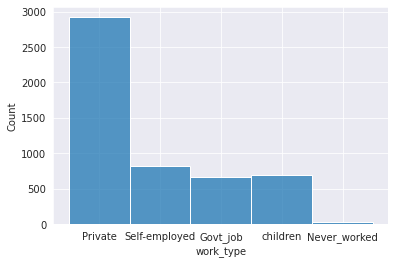

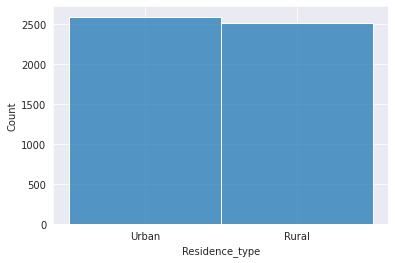

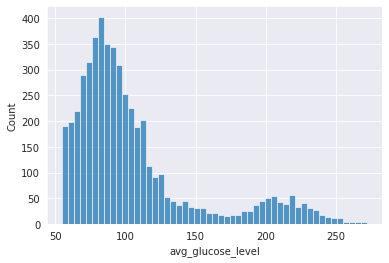

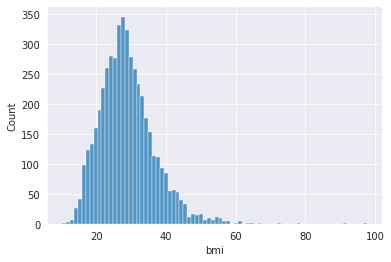

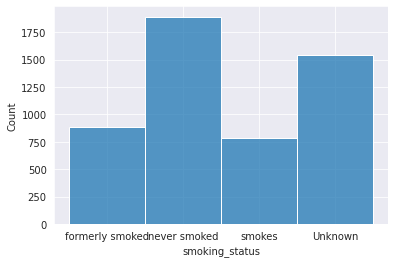

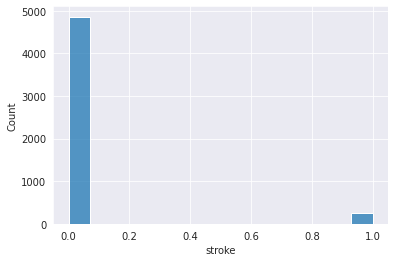

In [361]:
for i in df.columns:
  sns.histplot(df[i])
  plt.show()


In [362]:
df['log_glucose'] = np.log(df['avg_glucose_level'])

In [363]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,log_glucose
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,5.432367
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,5.309307
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4.662684
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5.143008
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5.159745


In [364]:
#df.drop('avg_glucose_level',axis = 'columns',inplace = True)

In [365]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,log_glucose
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,5.432367
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,5.309307
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4.662684
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5.143008
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5.159745


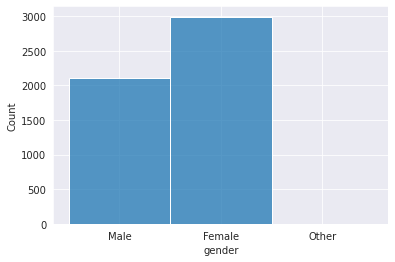

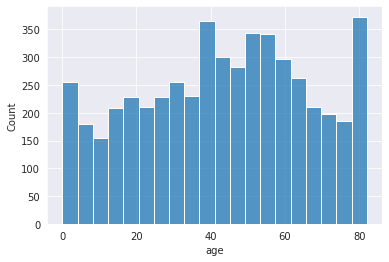

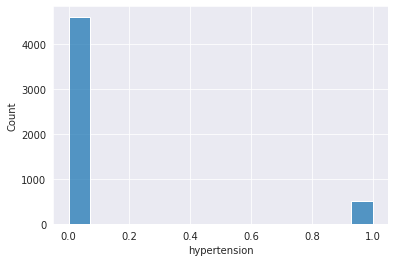

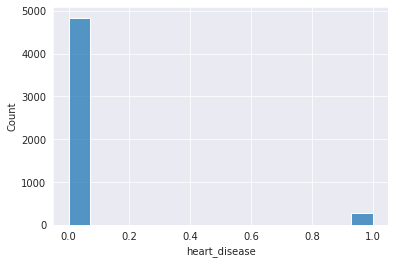

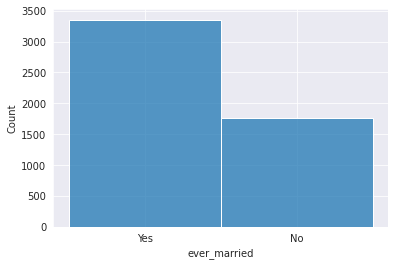

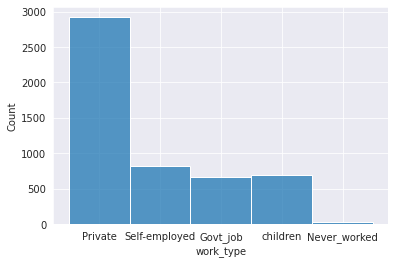

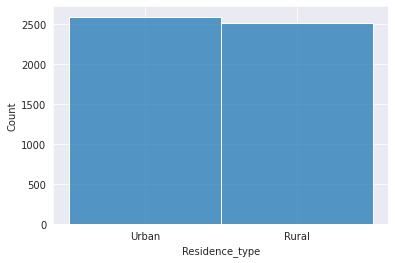

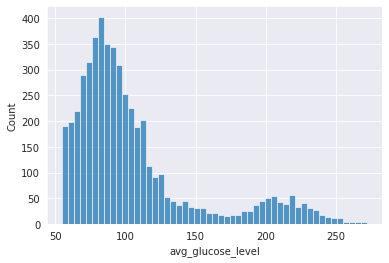

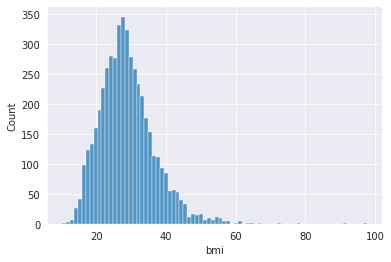

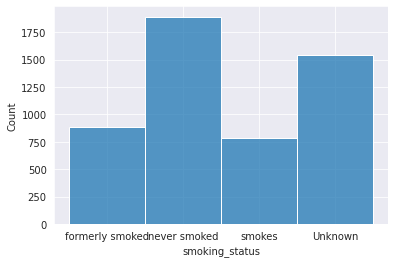

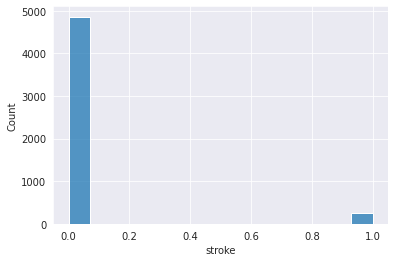

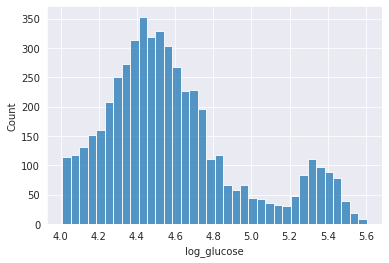

In [366]:
for i in df.columns:
  sns.histplot(df[i])
  plt.show()

In [367]:
df.skew().sort_values(ascending=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


stroke               4.193284
heart_disease        3.947244
hypertension         2.715392
avg_glucose_level    1.572284
bmi                  1.055340
log_glucose          0.882751
age                 -0.137059
dtype: float64

In [368]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,log_glucose
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,5.432367
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,5.309307
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4.662684
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5.143008
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5.159745


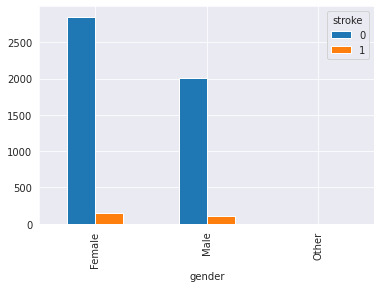

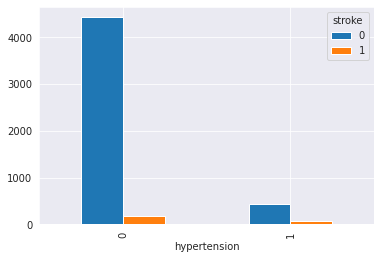

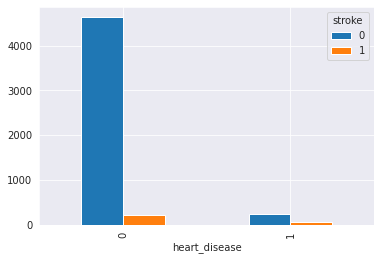

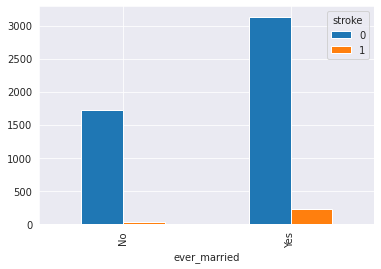

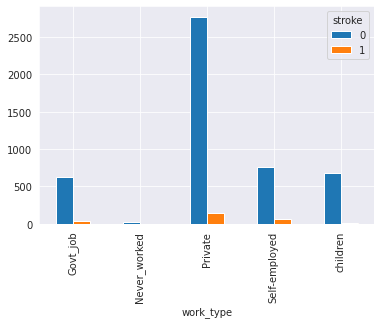

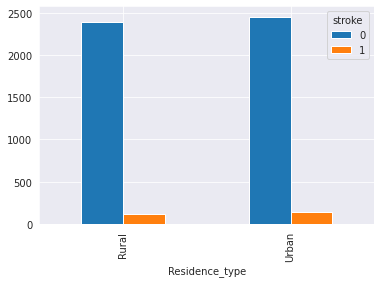

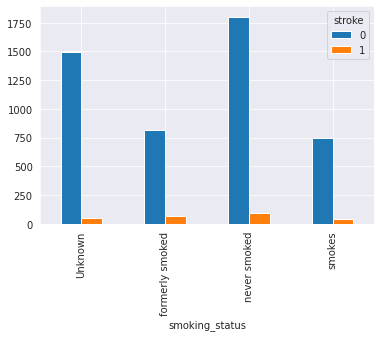

In [369]:

for i in df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]:
  pd.crosstab(df[i],df.stroke).plot(kind = 'bar')

In [370]:
two_col = df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]

In [371]:
#binary categorical features in terms of churn rate:
x = [(df['stroke'].groupby(df[i]).mean()) for i in two_col ]
x

[gender
 Female    0.047094
 Male      0.051064
 Other     0.000000
 Name: stroke, dtype: float64, hypertension
 0    0.039679
 1    0.132530
 Name: stroke, dtype: float64, heart_disease
 0    0.041787
 1    0.170290
 Name: stroke, dtype: float64, ever_married
 No     0.016505
 Yes    0.065613
 Name: stroke, dtype: float64, work_type
 Govt_job         0.050228
 Never_worked     0.000000
 Private          0.050940
 Self-employed    0.079365
 children         0.002911
 Name: stroke, dtype: float64, Residence_type
 Rural    0.045346
 Urban    0.052003
 Name: stroke, dtype: float64, smoking_status
 Unknown            0.030440
 formerly smoked    0.079096
 never smoked       0.047569
 smokes             0.053232
 Name: stroke, dtype: float64]

In [372]:
y = pd.DataFrame(x)

In [373]:
df.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
45.00     85
79.00     85
53.00     85
55.00     83
50.00     83
59.00     80
31.00     79
49.00     79
56.00     77
37.00     76
61.00     76
47.00     75
44.00     75
62.00     74
40.00     74
63.00     74
41.00     73
60.00     72
38.00     72
39.00     71
42.00     71
32.00     71
80.00     70
43.00     70
34.00     68
58.00     68
48.00     66
5.00      65
23.00     64
65.00     62
26.00     62
46.00     62
71.00     61
18.00     60
66.00     60
17.00     60
81.00     60
20.00     59
8.00      58
13.00     57
25.00     57
33.00     57
82.00     56
2.00      55
30.00     55
24.00     55
27.00     55
14.00     54
35.00     54
28.00     54
69.00     54
75.00     53
64.00     53
36.00     52
16.00     52
29.00     51
76.00     50
19.00     50
67.00     49
21.00     47
68.00     47
73.00     46
3.00      46
22.00     45
72.00     45
15.00     45
70.00     45
12.00     45
77.00     42
74.00     40
9.00      38
11.00     36

In [374]:
pd.set_option('display.max_rows', None)
m =df['stroke'].groupby(df.age).mean()
m.dtype

dtype('float64')

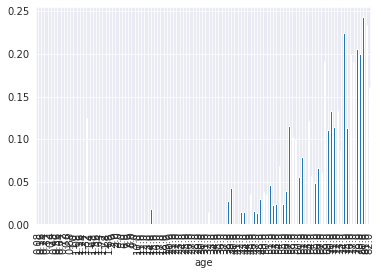

In [375]:
m.plot(kind = 'bar')

In [376]:
t = pd.pivot_table(df,values= 'stroke',index = ['work_type'],columns =['Residence_type'] ,aggfunc = np.mean)

In [377]:
t

Residence_type,Rural,Urban
work_type,,
Govt_job,0.044872,0.055072
Never_worked,0.000000,0.000000
Private,0.046512,0.055366
Self-employed,0.078880,0.079812
children,0.002941,0.002882


In [378]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,log_glucose
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,5.432367
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,5.309307
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,4.662684
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,5.143008
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,5.159745


In [379]:
df[['smoking_status','Residence_type','stroke']].groupby(df['Residence_type']).mean()

,stroke
Residence_type,
Rural,0.045346
Urban,0.052003


#Feature Engineering

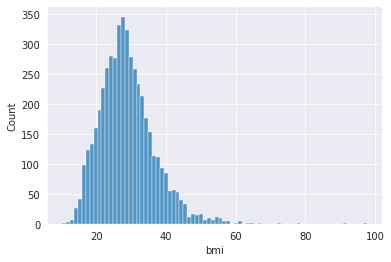

In [380]:
sns.histplot(data =df,x = 'bmi')

In [381]:
df.bmi.isnull().sum()/len(df)

0.03933463796477495

In [382]:
# we can drop the outliers
df.dropna(axis = 'columns',inplace = True)

In [383]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
log_glucose          0
dtype: int64

In [384]:
df.duplicated().sum()
# there are no duplicate values

0

In [385]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,log_glucose
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,5.432367
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,5.309307
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,4.662684
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,5.143008
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,5.159745


In [386]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,log_glucose
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,5.432367
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,5.309307
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,4.662684
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,5.143008
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,5.159745


In [387]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [388]:
df.loc[df.gender=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,log_glucose
3116,Other,26.0,0,0,No,Private,Rural,143.33,formerly smoked,0,4.96515


In [389]:
df['gender'] = df['gender'].apply( lambda x:1 if x =="Female" else 0 )

In [390]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,log_glucose
0,0,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,5.432367
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,5.309307
2,0,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,4.662684
3,1,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,5.143008
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,5.159745


In [391]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [392]:
df.ever_married = df.ever_married.map({'Yes' : 1, 'No' : 0})

In [393]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,log_glucose
0,0,67.0,0,1,1,Private,Urban,228.69,formerly smoked,1,5.432367
1,1,61.0,0,0,1,Self-employed,Rural,202.21,never smoked,1,5.309307
2,0,80.0,0,1,1,Private,Rural,105.92,never smoked,1,4.662684
3,1,49.0,0,0,1,Private,Urban,171.23,smokes,1,5.143008
4,1,79.0,1,0,1,Self-employed,Rural,174.12,never smoked,1,5.159745


In [394]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [395]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [396]:
df['Residence_type'] = df['Residence_type'].apply(lambda x:1 if x == 'Urban' else 0)

In [397]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,log_glucose
0,0,67.0,0,1,1,Private,1,228.69,formerly smoked,1,5.432367
1,1,61.0,0,0,1,Self-employed,0,202.21,never smoked,1,5.309307
2,0,80.0,0,1,1,Private,0,105.92,never smoked,1,4.662684
3,1,49.0,0,0,1,Private,1,171.23,smokes,1,5.143008
4,1,79.0,1,0,1,Self-employed,0,174.12,never smoked,1,5.159745


In [398]:
df = pd.get_dummies(df)

In [399]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,log_glucose,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,1,5.432367,0,0,1,0,0,0,1,0,0
1,1,61.0,0,0,1,0,202.21,1,5.309307,0,0,0,1,0,0,0,1,0
2,0,80.0,0,1,1,0,105.92,1,4.662684,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,1,1,171.23,1,5.143008,0,0,1,0,0,0,0,0,1
4,1,79.0,1,0,1,0,174.12,1,5.159745,0,0,0,1,0,0,0,1,0


In [400]:
df['log_glucose'] = np.log(df['avg_glucose_level'])

In [401]:
df_log.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'stroke', 'log_glucose', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [402]:
df_log = df.drop('avg_glucose_level',axis = 'columns')
df = df.drop('log_glucose',axis = 'columns')

In [403]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,1,0,0,1,0,0,0,1,0,0
1,1,61.0,0,0,1,0,202.21,1,0,0,0,1,0,0,0,1,0
2,0,80.0,0,1,1,0,105.92,1,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,1,1,171.23,1,0,0,1,0,0,0,0,0,1
4,1,79.0,1,0,1,0,174.12,1,0,0,0,1,0,0,0,1,0


In [404]:
df_log.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,stroke,log_glucose,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,1,5.432367,0,0,1,0,0,0,1,0,0
1,1,61.0,0,0,1,0,1,5.309307,0,0,0,1,0,0,0,1,0
2,0,80.0,0,1,1,0,1,4.662684,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,1,1,1,5.143008,0,0,1,0,0,0,0,0,1
4,1,79.0,1,0,1,0,1,5.159745,0,0,0,1,0,0,0,1,0


#Modelling

In [405]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,1,0,0,1,0,0,0,1,0,0
1,1,61.0,0,0,1,0,202.21,1,0,0,0,1,0,0,0,1,0
2,0,80.0,0,1,1,0,105.92,1,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,1,1,171.23,1,0,0,1,0,0,0,0,0,1
4,1,79.0,1,0,1,0,174.12,1,0,0,0,1,0,0,0,1,0


In [406]:
df_Y = df.stroke
df_X = df.drop('stroke',axis = 'columns')

In [407]:
df_log_Y = df_log.stroke
df_log_X = df_log.drop('stroke',axis = 'columns')

In [408]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(df_log_X, df_log_Y, test_size=0.33, random_state=42)

In [477]:
from sklearn import naive_bayes
lr = LogisticRegression()
rc = RidgeClassifier()
supportvector = svm.SVC(probability = True)
Knn = KNeighborsClassifier(n_neighbors = 8)
naive = GaussianNB()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gradient = GradientBoostingClassifier()
xgb = XGBClassifier()

In [410]:
lr.fit(X_train,y_train)
rc.fit(X_train,y_train)
supportvector.fit(X_train,y_train)
Knn.fit(X_train,y_train)
naive.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rf.fit(X_train,y_train)
ada.fit(X_train,y_train)
gradient.fit(X_train,y_train)
xgb.fit(X_train,y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


XGBClassifier()

In [411]:
predicted = lr.predict(X_test)
accuracy = lr.score(X_test,y_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test)))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [418]:

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687

[[1591    0]
 [  96    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [417]:
y_test.value_counts()

0    1591
1      96
Name: stroke, dtype: int64

In [420]:
xgb.fit(X_log_train,y_log_train)

XGBClassifier()

In [421]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_log_test, xgb.predict(X_log_test)))
print(confusion_matrix(y_log_test, xgb.predict(X_log_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687

[[1591    0]
 [  96    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SyntaxError: ignored

In [435]:
skf = StratifiedGroupKFold(n_splits=5)
for train, test in skf.split(df_X, df_Y):
  print(train)

[   1    2    3 ... 5107 5108 5109]
[   0    1    2 ... 5107 5108 5109]
[   0    1    2 ... 5107 5108 5109]
[   0    1    2 ... 5107 5108 5109]
[   0    1    2 ... 5107 5108 5109]


In [436]:
train

array([   0,    1,    2, ..., 5107, 5108, 5109])

In [446]:
round (k.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [443]:
df.head().T

,0,1,2,3,4
gender,0.00,1.00,0.00,1.00,1.00
age,67.00,61.00,80.00,49.00,79.00
hypertension,0.00,0.00,0.00,0.00,1.00
heart_disease,1.00,0.00,1.00,0.00,0.00
ever_married,1.00,1.00,1.00,1.00,1.00
Residence_type,1.00,0.00,0.00,1.00,0.00
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
stroke,1.00,1.00,1.00,1.00,1.00
work_type_Govt_job,0.00,0.00,0.00,0.00,0.00
work_type_Never_worked,0.00,0.00,0.00,0.00,0.00


In [444]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,1,0,0,1,0,0,0,1,0,0
1,1,61.0,0,0,1,0,202.21,1,0,0,0,1,0,0,0,1,0
2,0,80.0,0,1,1,0,105.92,1,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,1,1,171.23,1,0,0,1,0,0,0,0,0,1
4,1,79.0,1,0,1,0,174.12,1,0,0,0,1,0,0,0,1,0


In [445]:
k = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

#SMOTE

In [450]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(df_log_X,df_log_Y, test_size = 0.25, shuffle = True, random_state = 2021)

#smoteresampling 
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train.ravel())

print('Shape of Training features: {}'.format(X_resample.shape))
print('Shape of Training targets: {}'.format(y_resample.shape))
print('Shape of Testing features: {}'.format(X_test.shape))
print('Shape of Testing targets: {}'.format(y_test.shape))

Shape of Training features: (7284, 16)
Shape of Training targets: (7284,)
Shape of Testing features: (1278, 16)
Shape of Testing targets: (1278,)


In [462]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
xgb.fit(X_resample, y_resample)
y_preds = xgb.predict(X_test)
y_probs = xgb.predict_proba(X_test)
print(classification_report(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, xgb.predict(X_test)))
print (roc_auc_score(y_test,y_probs[:,1])*100)


              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1219
           1       0.12      0.31      0.17        59

    accuracy                           0.86      1278
   macro avg       0.54      0.60      0.55      1278
weighted avg       0.92      0.86      0.89      1278

[[1082  137]
 [  41   18]]
75.82555859901838


In [460]:
y_probs

array([[0.24460989, 0.7553901 ],
       [0.9688073 , 0.03119271],
       [0.9693393 , 0.03066069],
       ...,
       [0.9856076 , 0.01439238],
       [0.8109554 , 0.18904462],
       [0.11163771, 0.8883623 ]], dtype=float32)

In [463]:
#new data
X_resample, y_resample = smote.fit_resample(df_log_X,df_log_Y)

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size = 0.25, shuffle = True, random_state = 2021)


In [472]:
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)
y_probs = xgb.predict_proba(X_test)
from sklearn.metrics import accuracy_score
pred = xgb.predict(X_train)
print('training accuracy_score',accuracy_score(y_train, pred))
print('test accuracy_score',accuracy_score(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test)))
print('confusion_matrix',confusion_matrix(y_test, xgb.predict(X_test)))
print ('roc auc score',roc_auc_score(y_test,y_probs[:,1])*100)

training accuracy_score 0.9146893430256481
test accuracy_score 0.9078568490333196
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1204
           1       0.88      0.94      0.91      1227

    accuracy                           0.91      2431
   macro avg       0.91      0.91      0.91      2431
weighted avg       0.91      0.91      0.91      2431

confusion_matrix [[1049  155]
 [  69 1158]]
roc auc score 97.07870667457294


In [473]:
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
y_probs = lr.predict_proba(X_test)
from sklearn.metrics import accuracy_score
pred = lr.predict(X_train)
print('training accuracy_score',accuracy_score(y_train, pred))
print('test accuracy_score',accuracy_score(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))
print('confusion_matrix',confusion_matrix(y_test, lr.predict(X_test)))
print ('roc auc score',roc_auc_score(y_test,y_probs[:,1])*100)

training accuracy_score 0.8817720477300782
test accuracy_score 0.879062114356232
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1204
           1       0.88      0.88      0.88      1227

    accuracy                           0.88      2431
   macro avg       0.88      0.88      0.88      2431
weighted avg       0.88      0.88      0.88      2431

confusion_matrix [[1061  143]
 [ 151 1076]]
roc auc score 95.48733236400263


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [479]:
Knn.fit(X_train, y_train)
y_preds = Knn.predict(X_test)
y_probs = Knn.predict_proba(X_test)
from sklearn.metrics import accuracy_score
pred = Knn.predict(X_train)
print('training accuracy_score',accuracy_score(y_train, pred))
print('test accuracy_score',accuracy_score(y_test, Knn.predict(X_test)))
print(classification_report(y_test, Knn.predict(X_test)))
print('confusion_matrix',confusion_matrix(y_test, Knn.predict(X_test)))
print ('roc auc score',roc_auc_score(y_test,y_probs[:,1])*100)

training accuracy_score 0.9273076395556165
test accuracy_score 0.9164952694364459
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1204
           1       0.87      0.97      0.92      1227

    accuracy                           0.92      2431
   macro avg       0.92      0.92      0.92      2431
weighted avg       0.92      0.92      0.92      2431

confusion_matrix [[1033  171]
 [  32 1195]]
roc auc score 96.94728519712883


In [478]:
supportvector.fit(X_train, y_train)
y_preds = supportvector.predict(X_test)
y_probs = supportvector.predict_proba(X_test)
from sklearn.metrics import accuracy_score
pred = supportvector.predict(X_train)
print('training accuracy_score',accuracy_score(y_train, pred))
print('test accuracy_score',accuracy_score(y_test, supportvector.predict(X_test)))
print(classification_report(y_test, supportvector.predict(X_test)))
print('confusion_matrix',confusion_matrix(y_test, supportvector.predict(X_test)))
print ('roc auc score',roc_auc_score(y_test,y_probs[:,1])*100)

training accuracy_score 0.7686188451515568
test accuracy_score 0.7844508432743726
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1204
           1       0.74      0.87      0.80      1227

    accuracy                           0.78      2431
   macro avg       0.79      0.78      0.78      2431
weighted avg       0.79      0.78      0.78      2431

confusion_matrix [[ 837  367]
 [ 157 1070]]
roc auc score 87.00870096147857


In [481]:
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)
from sklearn.metrics import accuracy_score
pred = rf.predict(X_train)
print('training accuracy_score',accuracy_score(y_train, pred))
print('test accuracy_score',accuracy_score(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))
print('confusion_matrix',confusion_matrix(y_test, rf.predict(X_test),labels=[1,0]))
print ('roc auc score',roc_auc_score(y_test,y_probs[:,1])*100)

training accuracy_score 1.0
test accuracy_score 0.9485808309337721
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1204
           1       0.94      0.96      0.95      1227

    accuracy                           0.95      2431
   macro avg       0.95      0.95      0.95      2431
weighted avg       0.95      0.95      0.95      2431

confusion_matrix [[1179   48]
 [  77 1127]]
roc auc score 99.06312698502953


In [483]:
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
pred_prob1 = xgb.predict_proba(X_test)
pred_prob2 = rf.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9707870667457295 0.9905706866814503


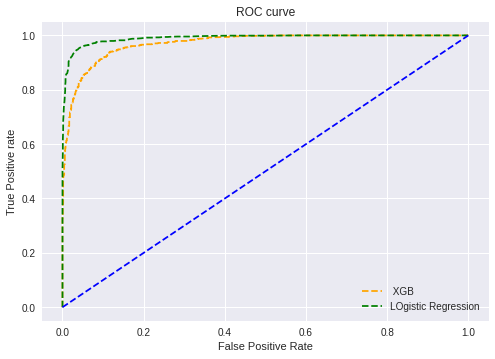

In [485]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=' XGB')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='LOgistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();